In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("iris flower file.csv")

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.isnull().sum().sum()

np.int64(0)

<Axes: >

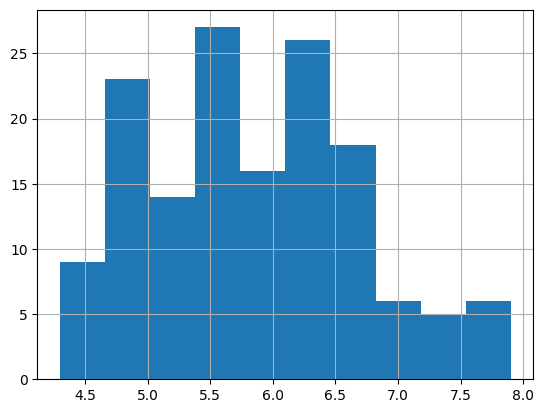

In [6]:
data['sepal_length'].hist()

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

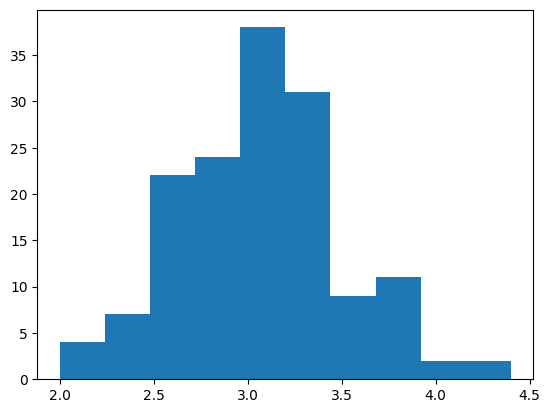

In [7]:
plt.hist(data['sepal_width'])

<Axes: >

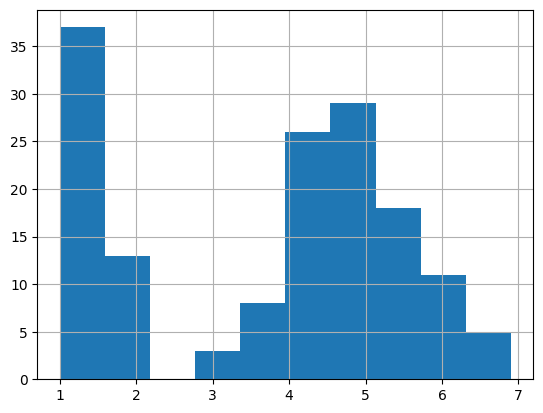

In [8]:
data['petal_length'].hist()

<Axes: >

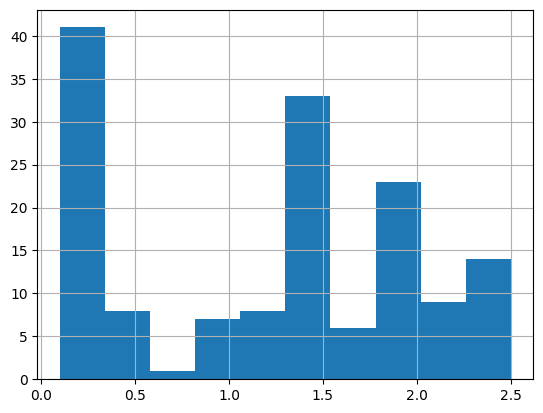

In [9]:
data['petal_width'].hist()

In [10]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [11]:
colors=['blue','black','red']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

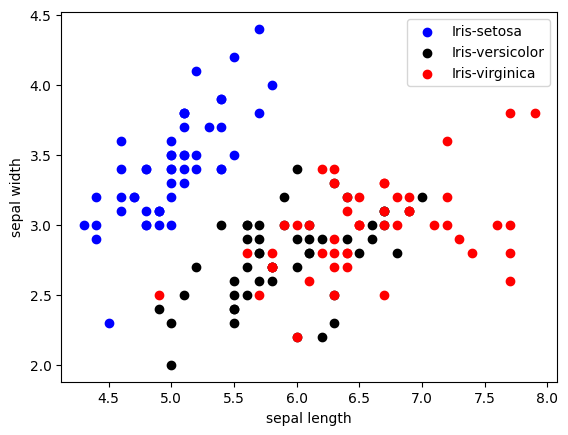

In [12]:
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

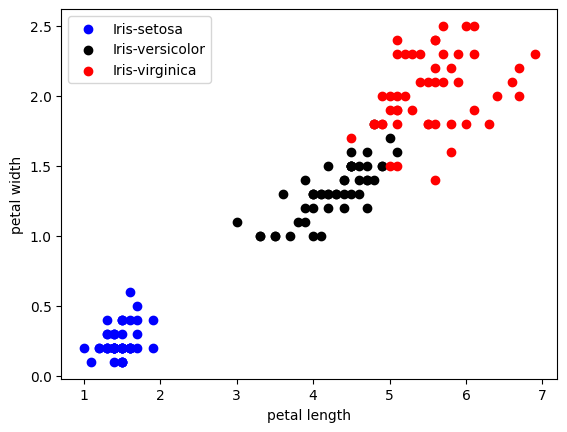

In [13]:
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

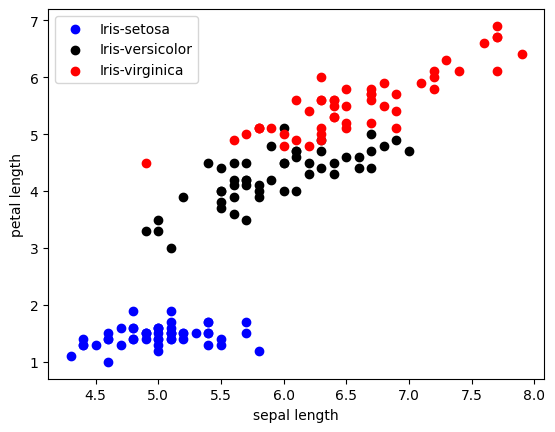

In [14]:
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

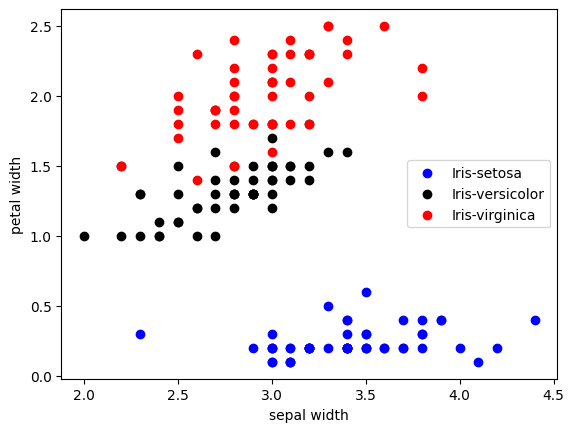

In [15]:
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.legend()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
float_data=data.drop(columns='species',axis=1)

In [18]:
float_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [19]:
corr=float_data.corr()

<Axes: >

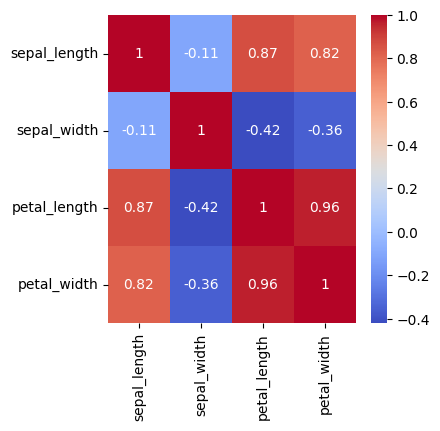

In [20]:
fig,axis=plt.subplots(figsize=(4,4))
sns.heatmap(corr,annot=True,ax=axis,cmap='coolwarm')

In [21]:
x

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


In [22]:
p=data.drop(columns='species',axis=1)

In [23]:
q=data['species']

In [24]:
p

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
q

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [26]:
p_train,p_test,q_train,q_test=train_test_split(p,q,test_size=0.2,random_state=5)

In [27]:
model=KNeighborsClassifier()

In [28]:
model.fit(p_train,q_train)

KNeighborsClassifier()

In [29]:
accuracy=model.score(p_train,q_train)

In [30]:
accuracy

0.9833333333333333

In [31]:
accuracy_test=model.score(p_test,q_test)

In [32]:
accuracy_test

0.9333333333333333